### scikit-learn
Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  

Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)

Podstawowa biblioteka do uczenia maszynowego w języku Python.

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install scikit-learn
```
Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install --upgrade scikit-learn
```
Kurs stworzony w oparciu o wersję `0.22.1`

### Spis treści:
1. [Import bibliotek](#0)
2. [Wygenerowanie danych](#1)
3. [Utworzenie kopii danych](#2)
4. [Sprawdzenie braków](#3)
5. [Uzupełnienie braków - SimpleImputer](#4)
6. [Braki danych w szeregach czasowych](#5)




### <a name='0'></a> Import bibliotek

In [1]:
import numpy as np
import pandas as pd
import sklearn

sklearn.__version__

'1.8.0'

### <a name='1'></a> Wygenerowanie danych

In [2]:
data = {
    'size': ['XL', 'L', 'M', np.nan, 'M', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender': ['female', 'male', np.nan, 'female', 'female', 'male'],
    'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight': [500, 450, 300, np.nan, 410, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}

df_raw = pd.DataFrame(data=data)
df_raw

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


### <a name='2'></a> Utworzenie kopii danych



In [3]:
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   6 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  4 non-null      float64
 5   bought  6 non-null      object 
dtypes: float64(2), object(4)
memory usage: 420.0+ bytes


### <a name='3'></a> Sprawdzenie braków



In [5]:
df.isnull()

,size,color,gender,price,weight,bought
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,True,False,False,False,True,False
4,False,False,False,False,False,False
5,False,False,False,False,True,False


In [6]:
df.isnull().sum()

size      1
color     0
gender    1
price     1
weight    2
bought    0
dtype: int64

In [7]:
df.isnull().sum().sum()

np.int64(5)

In [8]:
df.isnull().sum() / len(df)

size      0.166667
color     0.000000
gender    0.166667
price     0.166667
weight    0.333333
bought    0.000000
dtype: float64

### <a name='4'></a> Uzupełnienie braków - SimpleImputer

In [9]:
df[['weight']]

,weight
0,500.0
1,450.0
2,300.0
3,NaN
4,410.0
5,NaN


In [14]:
from sklearn.impute import SimpleImputer

# strategy: 'mean', 'median', 'most_frequent', 'constant'
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df[['weight']])

,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'mean'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation. If a feature has nomissing values at fit/train time, the feature won't appear onthe missing indicator even if there are missing values attransform/test time.",False
,"keep_empty_features keep_empty_features: bool, default=FalseIf True, features that consist exclusively of missing values when`fit` is called are returned in results when `transform` is called.The imputed value is always `0` except when `strategy=""constant""`in which case `fill_value` will be used instead... versionadded:: 1.2",False


In [15]:
imputer.statistics_

array([415.])

In [16]:
imputer.transform(df[['weight']])

array([[500.],
       [450.],
       [300.],
       [415.],
       [410.],
       [415.]])

In [17]:
df['weight'] = imputer.transform(df[['weight']])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [18]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=99.0)
imputer.fit_transform(df[['price']])

array([[199.],
       [ 89.],
       [ 99.],
       [129.],
       [ 79.],
       [ 89.]])

In [19]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='L')
imputer.fit_transform(df[['size']])

array([['XL'],
       ['L'],
       ['M'],
       ['L'],
       ['M'],
       ['M']], dtype=object)

In [20]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [21]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit_transform(df[['size']])

array([['XL'],
       ['L'],
       ['M'],
       ['M'],
       ['M'],
       ['M']], dtype=object)

In [22]:
df = df_raw.copy()
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [23]:
df.isnull().sum()

size      1
color     0
gender    1
price     1
weight    2
bought    0
dtype: int64

In [24]:
pd.isnull(df['weight'])

0    False
1    False
2    False
3     True
4    False
5     True
Name: weight, dtype: bool

In [25]:
df[pd.isnull(df['weight'])]

,size,color,gender,price,weight,bought
3,NaN,green,female,129.0,NaN,no
5,M,green,male,89.0,NaN,no


In [26]:
df[~pd.isnull(df['weight'])]

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,M,red,female,79.0,410.0,yes


In [27]:
pd.notnull(df['weight'])

0     True
1     True
2     True
3    False
4     True
5    False
Name: weight, dtype: bool

In [28]:
df[pd.notnull(df['weight'])]

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,M,red,female,79.0,410.0,yes


In [29]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [30]:
df.fillna(value='brak')

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,brak,brak,300.0,yes
3,brak,green,female,129.0,brak,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,brak,no


In [31]:
df.fillna(value=0.0)

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,0.0,0.0,300.0,yes
3,0.0,green,female,129.0,0.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,0.0,no


In [32]:
df['size']

0     XL
1      L
2      M
3    NaN
4      M
5      M
Name: size, dtype: object

In [33]:
df['size'].fillna(value='L', inplace=True)
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,L,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [34]:
df.dropna()

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
4,M,red,female,79.0,410.0,yes


In [35]:
df = df.dropna()
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
4,M,red,female,79.0,410.0,yes


### <a name='5'></a> Braki danych w szeregach czasowych

In [36]:
data = {'price': [108, 109, 110, 110, 109, np.nan, np.nan, 112, 111, 111]}
date_range = pd.date_range(start='01-01-2020 09:00', end='01-01-2020 18:00', periods=10)

df = pd.DataFrame(data=data, index=date_range)
df

,price
2020-01-01 09:00:00,108.0
2020-01-01 10:00:00,109.0
2020-01-01 11:00:00,110.0
2020-01-01 12:00:00,110.0
2020-01-01 13:00:00,109.0
2020-01-01 14:00:00,NaN
2020-01-01 15:00:00,NaN
2020-01-01 16:00:00,112.0
2020-01-01 17:00:00,111.0
2020-01-01 18:00:00,111.0


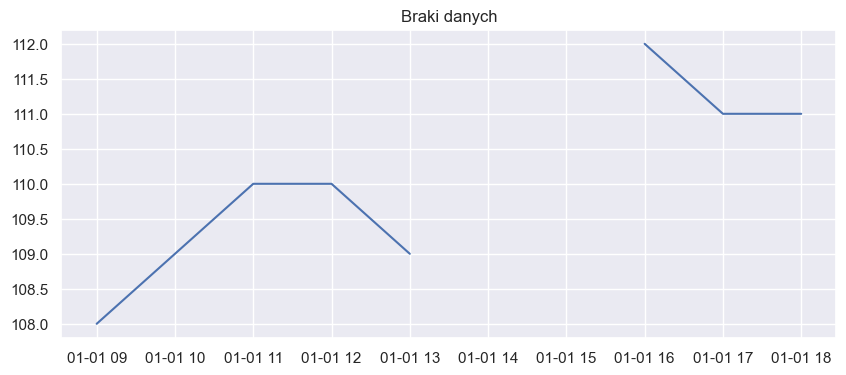

In [38]:
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns
register_matplotlib_converters()
sns.set()

plt.figure(figsize=(10, 4))
plt.title('Braki danych')
_ = plt.plot(df.price)

In [39]:
import plotly.express as px

df_plotly = df.reset_index()
px.line(df_plotly, 'index', 'price', width=600, height=400, 
        title='Szeregi czasowe - braki danych')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'index=%{x}<br>price=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array(['2020-01-01T09:00:00.000000000', '2020-01-01T10:00:00.000000000',
                          '2020-01-01T11:00:00.000000000', '2020-01-01T12:00:00.000000000',
                          '2020-01-01T13:00:00.000000000', '2020-01-01T14:00:00.000000000',
                          '2020-01-01T15:00:00.000000000', '2020-01-01T16:00:00.000000000',
                          '2020-01-01T17:00:00.000000000', '2020-01-01T18:00:00.000000000'],
                         dtype='datetime64[ns]'),
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAAAAW0AAAAAAAEBbQAAAAAAAgF' ... 'AAAABcQAAAAAAAwFtAAAAAAADAW0A='),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'height': 400,
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Szeregi czasowe - braki danych'},
               'width': 600,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'index'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'price'}}}
})

Usunięcie braków

In [40]:
df_plotly = df_plotly.dropna()
px.line(df_plotly, 'index', 'price', width=600, height=400, 
        title='Szeregi czasowe - braki danych')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'index=%{x}<br>price=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array(['2020-01-01T09:00:00.000000000', '2020-01-01T10:00:00.000000000',
                          '2020-01-01T11:00:00.000000000', '2020-01-01T12:00:00.000000000',
                          '2020-01-01T13:00:00.000000000', '2020-01-01T16:00:00.000000000',
                          '2020-01-01T17:00:00.000000000', '2020-01-01T18:00:00.000000000'],
                         dtype='datetime64[ns]'),
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAAAAW0AAAAAAAEBbQAAAAAAAgF' ... 'AAAFxAAAAAAADAW0AAAAAAAMBbQA=='),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'height': 400,
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Szeregi czasowe - braki danych'},
               'width': 600,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'index'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'price'}}}
})

Wypełnienie braków stałą wartością 0

In [41]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(0)
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, 
        title='Szeregi czasowe - braki danych - wstawienie 0')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'index=%{x}<br>price_fill=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array(['2020-01-01T09:00:00.000000000', '2020-01-01T10:00:00.000000000',
                          '2020-01-01T11:00:00.000000000', '2020-01-01T12:00:00.000000000',
                          '2020-01-01T13:00:00.000000000', '2020-01-01T14:00:00.000000000',
                          '2020-01-01T15:00:00.000000000', '2020-01-01T16:00:00.000000000',
                          '2020-01-01T17:00:00.000000000', '2020-01-01T18:00:00.000000000'],
                         dtype='datetime64[ns]'),
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAAAAW0AAAAAAAEBbQAAAAAAAgF' ... 'AAAABcQAAAAAAAwFtAAAAAAADAW0A='),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'height': 400,
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Szeregi czasowe - braki danych - wstawienie 0'},
               'width': 600,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'index'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'price_fill'}}}
})

Wypełnienie braków średnią

In [42]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(df_plotly['price'].mean())
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, 
        title='Szeregi czasowe - braki danych - wstawienie średniej')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'index=%{x}<br>price_fill=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array(['2020-01-01T09:00:00.000000000', '2020-01-01T10:00:00.000000000',
                          '2020-01-01T11:00:00.000000000', '2020-01-01T12:00:00.000000000',
                          '2020-01-01T13:00:00.000000000', '2020-01-01T14:00:00.000000000',
                          '2020-01-01T15:00:00.000000000', '2020-01-01T16:00:00.000000000',
                          '2020-01-01T17:00:00.000000000', '2020-01-01T18:00:00.000000000'],
                         dtype='datetime64[ns]'),
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAAAAW0AAAAAAAEBbQAAAAAAAgF' ... 'AAAABcQAAAAAAAwFtAAAAAAADAW0A='),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'height': 400,
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Szeregi czasowe - braki danych - wstawienie średniej'},
               'width': 600,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'index'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'price_fill'}}}
})

Zastosowanie interpolacji

In [43]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].interpolate()
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, 
        title='Szeregi czasowe - braki danych - interpolacja')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'index=%{x}<br>price_fill=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array(['2020-01-01T09:00:00.000000000', '2020-01-01T10:00:00.000000000',
                          '2020-01-01T11:00:00.000000000', '2020-01-01T12:00:00.000000000',
                          '2020-01-01T13:00:00.000000000', '2020-01-01T14:00:00.000000000',
                          '2020-01-01T15:00:00.000000000', '2020-01-01T16:00:00.000000000',
                          '2020-01-01T17:00:00.000000000', '2020-01-01T18:00:00.000000000'],
                         dtype='datetime64[ns]'),
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAAAAW0AAAAAAAEBbQAAAAAAAgF' ... 'AAAABcQAAAAAAAwFtAAAAAAADAW0A='),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'height': 400,
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Szeregi czasowe - braki danych - interpolacja'},
               'width': 600,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'index'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'price_fill'}}}
})

Wypełnienie braków metodą forward fill

In [44]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(method='ffill')
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, 
        title='Szeregi czasowe - braki danych - forward fill')

/var/folders/14/lsx5gcnn58q23ht_xjqydrnw0000gn/T/ipykernel_2642/4003333536.py:2: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'index=%{x}<br>price_fill=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array(['2020-01-01T09:00:00.000000000', '2020-01-01T10:00:00.000000000',
                          '2020-01-01T11:00:00.000000000', '2020-01-01T12:00:00.000000000',
                          '2020-01-01T13:00:00.000000000', '2020-01-01T14:00:00.000000000',
                          '2020-01-01T15:00:00.000000000', '2020-01-01T16:00:00.000000000',
                          '2020-01-01T17:00:00.000000000', '2020-01-01T18:00:00.000000000'],
                         dtype='datetime64[ns]'),
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAAAAW0AAAAAAAEBbQAAAAAAAgF' ... 'AAAABcQAAAAAAAwFtAAAAAAADAW0A='),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'height': 400,
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Szeregi czasowe - braki danych - forward fill'},
               'width': 600,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'index'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'price_fill'}}}
})

Wypełnienie braków metodą backward fill

In [45]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(method='bfill')
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, 
        title='Szeregi czasowe - braki danych')

/var/folders/14/lsx5gcnn58q23ht_xjqydrnw0000gn/T/ipykernel_2642/2609904324.py:2: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'index=%{x}<br>price_fill=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array(['2020-01-01T09:00:00.000000000', '2020-01-01T10:00:00.000000000',
                          '2020-01-01T11:00:00.000000000', '2020-01-01T12:00:00.000000000',
                          '2020-01-01T13:00:00.000000000', '2020-01-01T14:00:00.000000000',
                          '2020-01-01T15:00:00.000000000', '2020-01-01T16:00:00.000000000',
                          '2020-01-01T17:00:00.000000000', '2020-01-01T18:00:00.000000000'],
                         dtype='datetime64[ns]'),
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAAAAW0AAAAAAAEBbQAAAAAAAgF' ... 'AAAABcQAAAAAAAwFtAAAAAAADAW0A='),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'height': 400,
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Szeregi czasowe - braki danych'},
               'width': 600,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'index'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'price_fill'}}}
})